In [57]:
import sys

print(sys.executable)


c:\Users\Bhavik\AppData\Local\Programs\Python\Python313\python.exe


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import os
os.getcwd()

'd:\\bacancy\\Bacancy\\Kaggle'

In [2]:
df = pd.read_csv(r'train.csv')

In [61]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

>We aim to build a supervised machine learning model to predict the presence of coronary artery disease using structured clinical features.
>
>The model will output calibrated probabilities and will be optimized primarily for recall and PR-AUC to minimize false negatives.
>
>The solution will be developed with full pipeline integrity to prevent data leakage and ensure deployment readiness.

In [63]:
df.shape

(630000, 15)

In [64]:
df.dtypes

id                           int64
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [65]:
df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [66]:
df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [67]:
df.isnull().sum()

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

In [70]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [3]:
mapping = {'Absence':0, 'Presence':1}

df['Heart Disease'] = df['Heart Disease'].map(mapping)

In [72]:
df['Heart Disease'].value_counts()

Heart Disease
0    347546
1    282454
Name: count, dtype: int64

In [73]:
df['Heart Disease'].describe()

count    630000.000000
mean          0.448340
std           0.497324
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Heart Disease, dtype: float64

| Feature           | Type            | Key Stats          | Quick Insight                                              |
| ----------------- | --------------- | ------------------ | ---------------------------------------------------------- |
| Heart Disease     | Binary Target   | 44.8% positive     | Mild imbalance; accuracy still usable but recall important |
| Age               | Continuous      | 29–77 (mean 54)    | Realistic range; likely nonlinear risk increase            |
| Sex               | Binary          | 71% = 1            | Skewed toward one gender; check subgroup bias later        |
| Chest pain type   | Nominal (1–4)   | Median = 4         | Many asymptomatic cases; strong predictive candidate       |
| BP                | Continuous      | 94–200 (mean 130)  | No zero issues; hypertension likely important              |
| Cholesterol       | Continuous      | 126–564 (mean 245) | Right-skewed; possible transformation                      |
| FBS over 120      | Binary          | 8% positive        | Low prevalence; may be weak standalone signal              |
| EKG results       | Nominal (0–2)   | Spread across 0–2  | Likely moderate predictive power                           |
| Max HR            | Continuous      | 71–202 (mean 152)  | 202 may exceed theoretical limit; validate with Age        |
| Exercise angina   | Binary          | ~27% positive      | Clinically strong ischemia indicator                       |
| ST depression     | Continuous      | 0–6.2 (median 0.1) | Highly right-skewed; likely strong predictor               |
| Slope of ST       | Nominal (1–3)   | Mostly 1–2         | Categorical; do not treat as numeric magnitude             |
| Number of vessels | Ordinal (0–3)   | Mean 0.45          | Skewed toward 0; likely strong severity signal             |
| Thallium          | Nominal (3/6/7) | Median = 3         | Encoded categories; must OneHot                            |


In [74]:
df[df['Max HR']>220-df['Age']]

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
18,18,65,0,4,140,197,0,0,161,0,2.2,2,1,3,1
20,20,62,1,4,110,197,0,0,172,0,2.2,2,3,3,1
22,22,57,0,3,124,204,0,2,166,0,0.0,1,0,3,0
23,23,52,1,3,94,185,0,0,172,0,0.0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629966,629966,53,0,3,140,204,0,0,171,0,0.2,1,0,3,0
629978,629978,51,0,4,120,233,0,2,174,0,0.0,2,0,3,0
629983,629983,41,1,3,140,243,0,2,181,0,0.0,2,2,3,0
629989,629989,61,1,3,150,234,0,2,161,1,1.0,2,0,3,1


You can present it like this:

- **Condition checked:** `MaxHR > (220 - Age)`
- **Rows matching condition:** `166,688`
- **Total rows:** `630,000`
- **Share of dataset:** `166,688 / 630,000 = 0.2646 ≈ 26.5%`

**Summary:** `166,688` rows (about **26.5%** of the dataset) have `MaxHR` greater than `(220 - Age)`.

In [75]:
columns = ['Chest pain type', 'Thallium','Slope of ST','EKG results']
for col in columns:
    print(f"{col} unique values: {df[col].value_counts()}")

Chest pain type unique values: Chest pain type
4    329179
3    197278
2     74941
1     28602
Name: count, dtype: int64
Thallium unique values: Thallium
3    372286
7    246748
6     10966
Name: count, dtype: int64
Slope of ST unique values: Slope of ST
1    358293
2    256215
3     15492
Name: count, dtype: int64
EKG results unique values: EKG results
0    320116
2    308562
1      1322
Name: count, dtype: int64


**Observations**
- EKG = 1 (~0.2%)
- Thallium = 6 (~1.7%)
- Slope = 3 (~2.4%)

- OneHotEncoding will create sparse dummy columns.
- Logistic regression may give unstable coefficients for rare categories.
- Tree models usually handle rare categories better

**Skewness Check (Continuous Features)**

In [76]:
# Continuous features
continuous_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Calculate skewness
skewness = df[continuous_cols].skew().sort_values(ascending=False)

print("Skewness of Continuous Features:")
print(skewness)


Skewness of Continuous Features:
ST depression    1.328429
BP               0.629283
Cholesterol      0.273150
Age             -0.164011
Max HR          -0.754556
dtype: float64


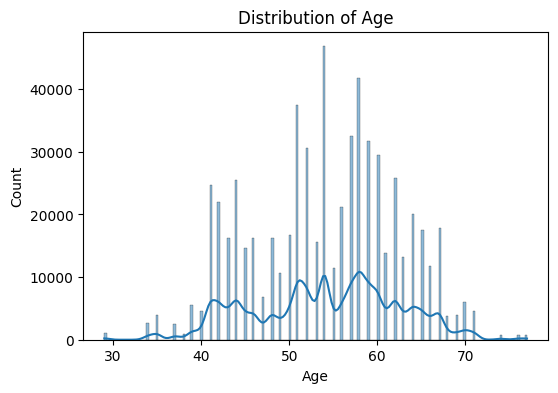

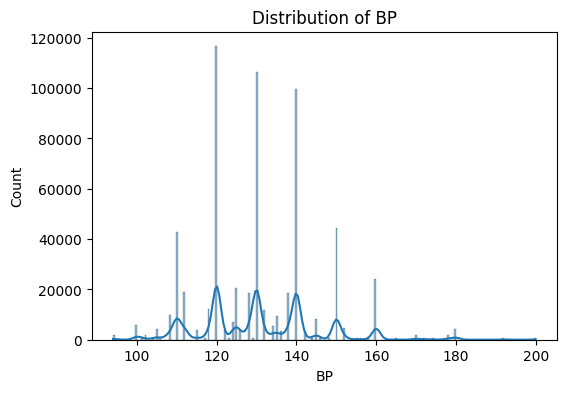

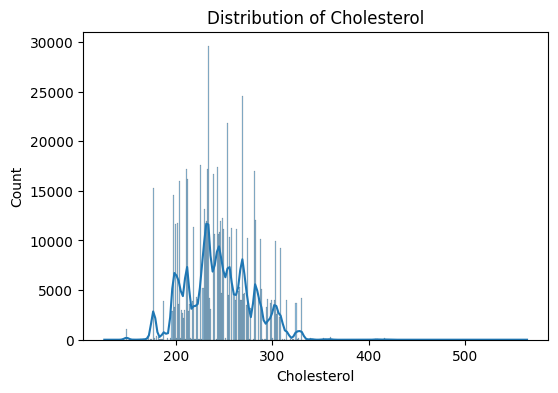

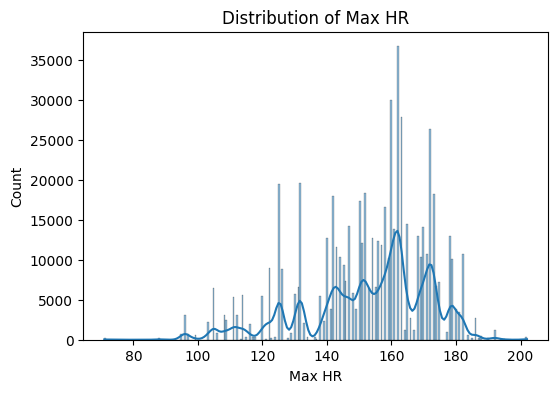

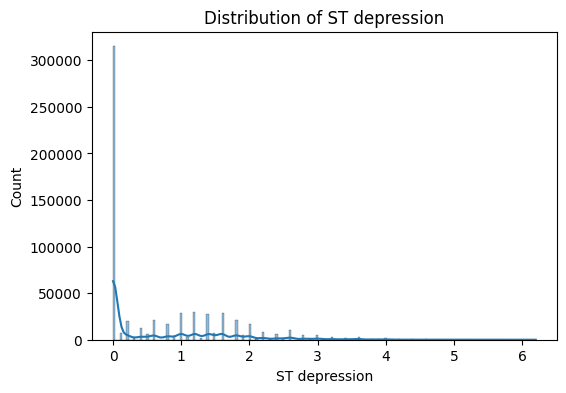

In [77]:
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Observations**

- **ST Depression**
  - Highly right-skewed (`skew > 1`)
  - Large spike near `0`
  - Long right tail extending beyond `6`
  - Interpretation:
  - Most patients show little or no ST depression
  - A small subset has very high ischemia
  - Next step:
  - Keep as-is for now and evaluate model output first
  - Consider a log transform later if needed

- **BP** (`skew = 0.63`)
  - Moderately right-skewed (`0.5-1` range)
  - Most values concentrated around `120-140`
  - Mild right tail present

- **Cholesterol** (`skew = 0.27`)
  - Nearly symmetric distribution
  - Although max reaches `564`, most values cluster around `200-300`

- **Age** (`skew = -0.16`)
  - Nearly symmetric
  - Slight left skew, indicating relatively more older than younger patients

- **Max HR** (`skew = -0.75`)
  - Moderately left-skewed
  - Most values concentrated around `150-170`
  - Fewer observations at lower heart-rate values

Correlation with Target:
Heart Disease              1.000000
Thallium                   0.605776
Chest pain type            0.460684
Exercise angina            0.441864
Number of vessels fluro    0.438604
ST depression              0.430641
Slope of ST                0.415050
Sex                        0.342446
EKG results                0.218961
Age                        0.212091
Cholesterol                0.082753
FBS over 120               0.033570
id                         0.000209
BP                        -0.005181
Max HR                    -0.440985
Name: Heart Disease, dtype: float64


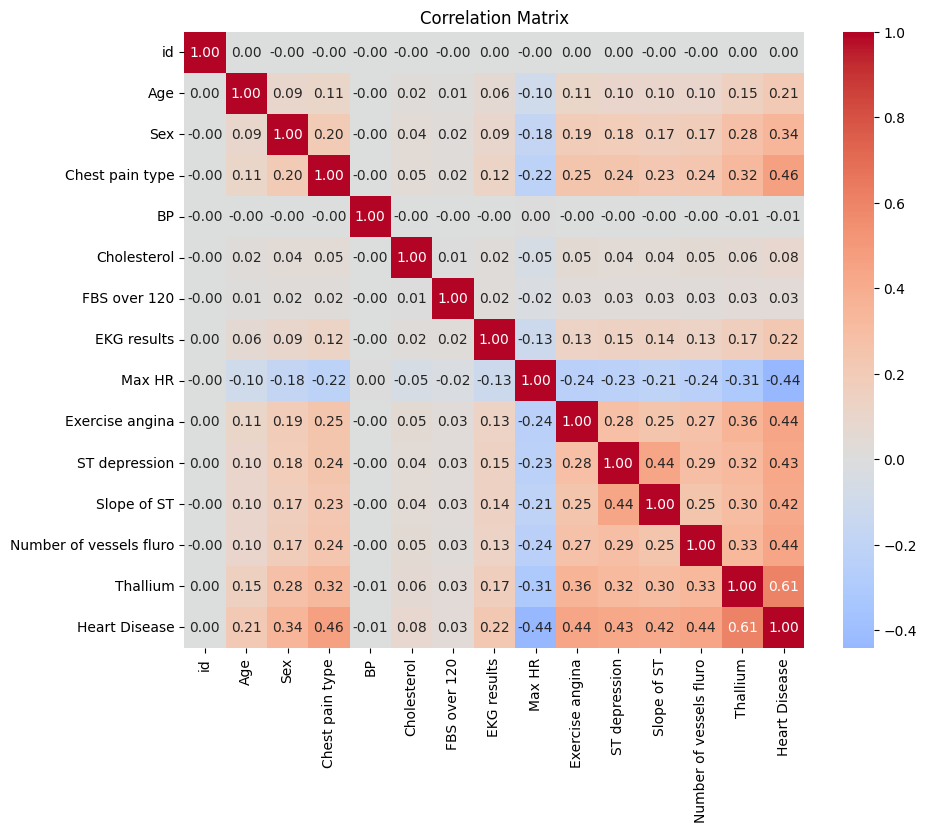

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Print top correlations with target
target_corr = corr_matrix['Heart Disease'].sort_values(ascending=False)

print("Correlation with Target:")
print(target_corr)

# Optional heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Key Findings

---

### 1. Thallium is the Strongest Predictor
| Feature | Correlation |
|---|---|
| Thallium | **+0.61** |

- Highest positive correlation with Heart Disease.
- Thallium test result almost directly indicates disease presence.
- **The dataset is heavily driven by stress test findings.**

---

### 2. Max HR has a Strong Negative Correlation
| Feature | Correlation |
|---|---|
| Max HR | **−0.44** |

- Higher maximum heart rate → **lower disease probability**.
- Physiologically consistent: reduced HR capacity is a cardiac risk marker.

---

### 3. Cluster of Strong Cardiac / Stress-Test Features
The following features form a functionally related group — all exercise or stress-test derived:

| Feature | Nature |
|---|---|
| Chest pain type | Symptom-based |
| Exercise angina | Stress-test |
| ST depression | Stress-test |
| Slope of ST | Stress-test |
| Number of vessels (fluro) | Diagnostic |
| Thallium | Diagnostic |

> ⚠️ **Implication:** These features may carry redundant information. Consider dimensionality reduction or feature selection on this cluster.

---

### 4. BP and Cholesterol are Weak Linear Predictors
| Feature | Correlation |
|---|---|
| BP | **≈ 0.00** |
| Cholesterol | **+0.08** |

- Near-zero linear correlation with the target.
- **Does NOT mean they are useless** — non-linear models (trees, boosting) may still extract signal.
- Worth monitoring in feature importance post-modeling.

---

### 5. Multicollinearity Observations
| Feature Pair | Correlation |
|---|---|
| ST depression ↔ Slope of ST | **0.44** |
| Thallium ↔ Number of vessels | **0.33** |
| Exercise angina ↔ ST depression | **0.28** |
| Max HR ↔ several features | **Negative** |

> ⚠️ **Implication:** Moderate multicollinearity exists within the stress-test feature cluster. This matters for **Logistic Regression and SVM** (inflated coefficients) but is less of a concern for **tree-based models**. Consider VIF analysis before finalizing features for linear models.

---

| Insight | Action |
|---|---|
| Thallium dominates | Keep; monitor for data leakage if it's a post-diagnosis test |
| Stress-test cluster | Evaluate for redundancy via VIF / PCA |
| BP & Cholesterol weak | Retain for non-linear models; reconsider for linear |
| Multicollinearity present | Run VIF before Logistic Regression |

## VIF test

In [79]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = df.drop(columns=['id', 'Heart Disease'])



X_const = add_constant(X)


vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# Remove constant row
vif_data = vif_data[vif_data["Feature"] != "const"]

# Sort by VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)


                    Feature       VIF
13                 Thallium  1.427578
10            ST depression  1.374105
11              Slope of ST  1.321994
9           Exercise angina  1.250132
12  Number of vessels fluro  1.235152
3           Chest pain type  1.200287
8                    Max HR  1.179239
2                       Sex  1.122867
7               EKG results  1.054916
1                       Age  1.036104
5               Cholesterol  1.006748
6              FBS over 120  1.002215
4                        BP  1.000078


> All VIF values are between 1.00 and 1.43.

- That means:
    - No multicollinearity problem.
    - Features are largely independent.
    - Logistic regression will be numerically stable.
    - We do not need to drop any feature for collinearity reasons.

In [80]:
def numeric_feature_analysis(df, feature):
    summary = df.groupby('Heart Disease')[feature].agg(['mean', 'median', 'std'])
    print(f"\nSummary statistics for {feature} by Target:")
    print(summary)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,4))
    sns.boxplot(x='Heart Disease', y=feature, data=df)
    plt.title(f"{feature} vs Heart Disease")
    plt.show()


Summary statistics for Age by Target:
                    mean  median       std
Heart Disease                             
0              52.558093    52.0  8.304120
1              56.079114    57.0  7.768723


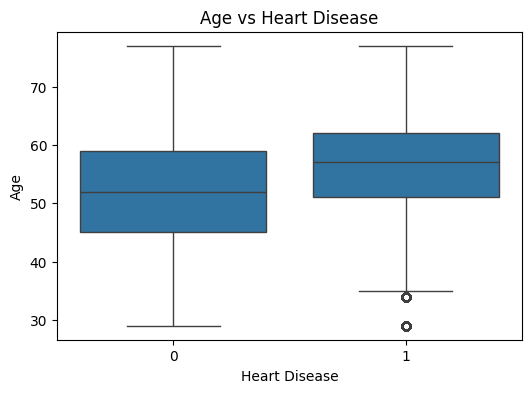


Summary statistics for BP by Target:
                     mean  median        std
Heart Disease                               
0              130.567381   130.0  15.135647
1              130.411366   130.0  14.776321


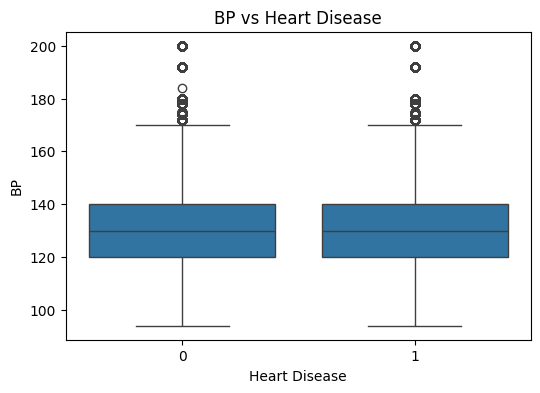


Summary statistics for Cholesterol by Target:
                     mean  median        std
Heart Disease                               
0              242.499102   239.0  34.080064
1              248.103585   246.0  32.922645


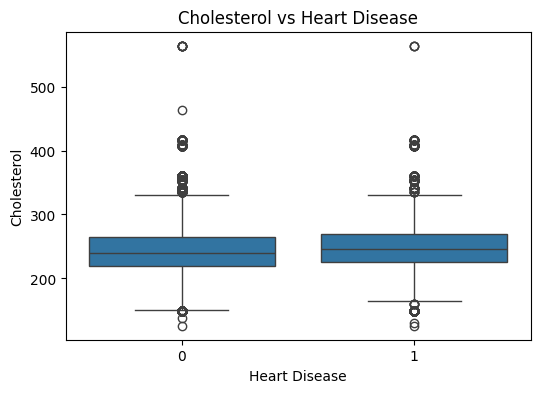


Summary statistics for Max HR by Target:
                     mean  median        std
Heart Disease                               
0              160.415105   162.0  14.740398
1              143.467372   146.0  19.722854


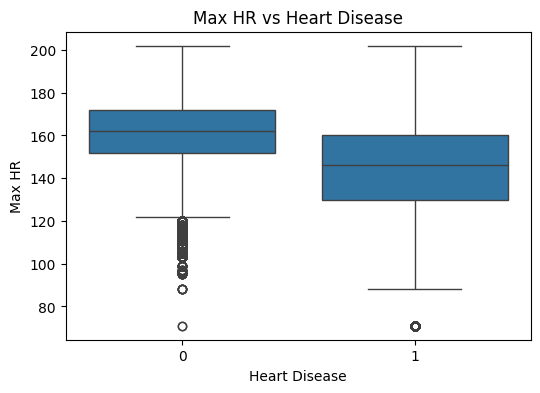


Summary statistics for ST depression by Target:
                   mean  median       std
Heart Disease                            
0              0.347808     0.0  0.634996
1              1.169104     1.2  1.066893


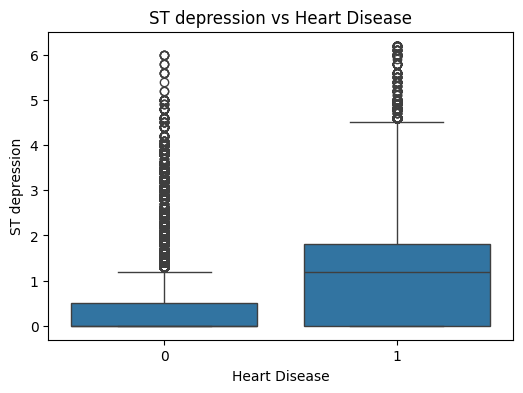

In [81]:
numeric_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

for col in numeric_cols:
    numeric_feature_analysis(df, col)


# Bivariate Analysis — Numeric Features vs Heart Disease

---

## Summary Statistics

| Feature | Mean (No Disease) | Mean (Disease) | Median (No Disease) | Median (Disease) | Correlation |
|---|---|---|---|---|---|
| Age | 52.6 | 56.1 | 52 | 57 | +0.21 |
| BP | 130.57 | 130.41 | 130 | 130 | ~0.00 |
| Cholesterol | 242.5 | 248.1 | 239 | 246 | +0.08 |
| Max HR | 160.4 | 143.5 | 162 | 146 | −0.44 |
| ST Depression | 0.35 | 1.17 | 0.00 | 1.20 | +0.43 |

---

## Feature-by-Feature Interpretation

### Age
- Mean shifts from 52.6 → 56.1 and median from 52 → 57 across groups.
- Separation is visible but overlap is large across the age range.
- Moderate predictor; consistent with correlation of +0.21.

---

### BP (Blood Pressure)
- Mean: 130.57 vs 130.41. Median: 130 vs 130. Distributions are nearly identical.
- No linear separation between groups whatsoever.
- Confirms near-zero correlation. **BP alone will not be predictive.**
- May still contribute signal through interaction terms (e.g., BP × Age, BP × Cholesterol).

---

### Cholesterol
- Small upward shift: mean 242.5 → 248.1, median 239 → 246.
- Heavy distributional overlap; difference is statistically marginal.
- Clinically surprising given cholesterol's established role in cardiovascular disease — this is a dataset-driven reality, not a clinical contradiction.
- Weak linear predictor (correlation +0.08); non-linear models may extract limited additional signal.

---

### Max HR
- Clear downward shift: mean 160.4 → 143.5, median 162 → 146.
- Strongest separation among all numeric features alongside ST depression.
- Lower max HR is strongly associated with disease presence — physiologically, reduced cardiac capacity under stress is a well-established risk indicator.
- Consistent with correlation of −0.44. **One of the top numeric predictors.**

---

### ST Depression
- Large shift: mean 0.35 → 1.17, median 0.00 → 1.20.
- Distribution separation is visually obvious; disease group is clearly elevated.
- Largest absolute mean difference among all numeric features.
- Consistent with correlation of +0.43. **Likely a top-3 feature overall.**

---

## Predictor Strength Ranking

| Rank | Feature | Strength | Direction |
|---|---|---|---|
| 1 | ST Depression | Strong | Positive |
| 2 | Max HR | Strong | Negative |
| 3 | Age | Moderate | Positive |
| 4 | Cholesterol | Weak | Positive |
| 5 | BP | Negligible | None |

---

## Key Observations

**On overlap:**
Even for the two strongest features — ST depression and Max HR — considerable distributional overlap exists between disease and no-disease groups. Single-feature thresholding will not produce a reliable classifier. The model must combine multiple signals to achieve meaningful separation.

**On physiological coherence:**
ST depression and Max HR are both products of stress test performance. Their dominance reinforces the earlier finding that this dataset is structurally stress-test heavy. Features derived from resting measurements (BP, Cholesterol) carry far less discriminative power in this particular dataset.

**On interaction potential:**
BP and Cholesterol show negligible standalone signal but should not be discarded prematurely. Tree-based and boosting models may find interaction effects that linear correlation fails to capture.

In [82]:
def categorical_feature_analysis(df, feature):
    cross_tab = pd.crosstab(df[feature], df['Heart Disease'], normalize='index')
    print(f"\nDisease proportion by {feature}:")
    print(cross_tab)

    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"{feature} vs Heart Disease (Proportion)")
    plt.ylabel("Proportion")
    plt.show()



Disease proportion by Sex:
Heart Disease         0         1
Sex                              
0              0.821236  0.178764
1              0.444067  0.555933


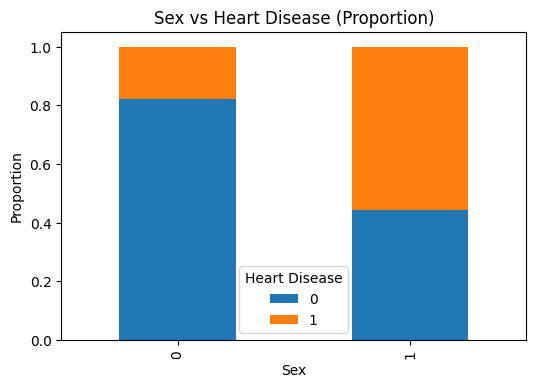


Disease proportion by Chest pain type:
Heart Disease           0         1
Chest pain type                    
1                0.891931  0.108069
2                0.837819  0.162181
3                0.809335  0.190665
4                0.302522  0.697478


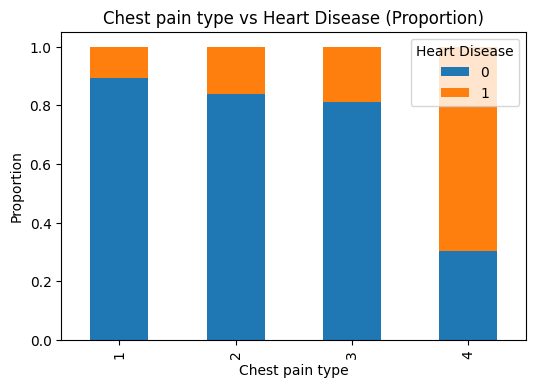


Disease proportion by FBS over 120:
Heart Disease         0         1
FBS over 120                     
0              0.556583  0.443417
1              0.495039  0.504961


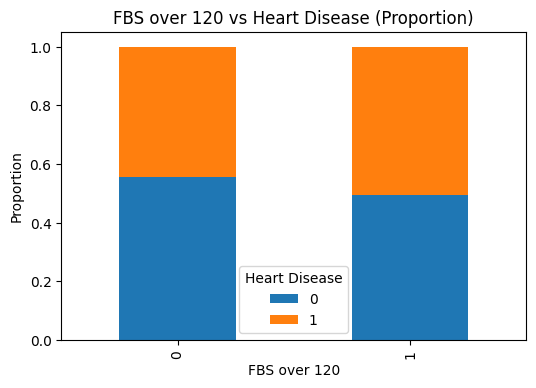


Disease proportion by EKG results:
Heart Disease         0         1
EKG results                      
0              0.658502  0.341498
1              0.639939  0.360061
2              0.440440  0.559560


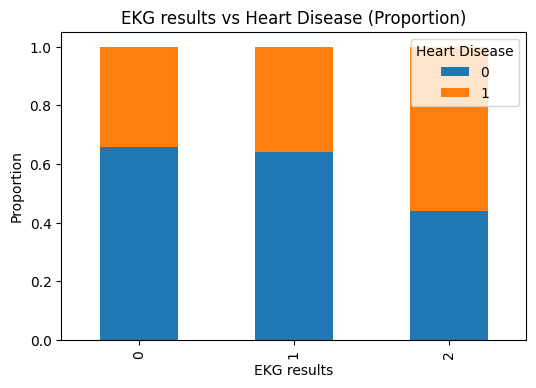


Disease proportion by Exercise angina:
Heart Disease           0         1
Exercise angina                    
0                0.686567  0.313433
1                0.193712  0.806288


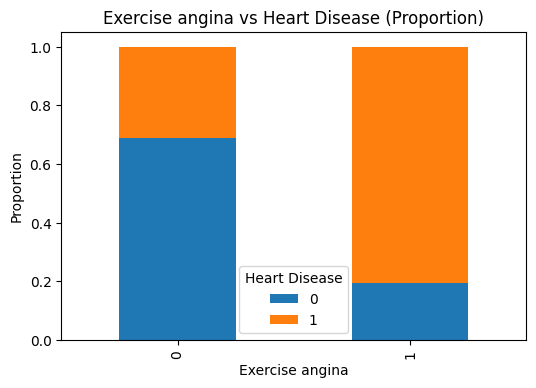


Disease proportion by Slope of ST:
Heart Disease         0         1
Slope of ST                      
1              0.737743  0.262257
2              0.307933  0.692067
3              0.278918  0.721082


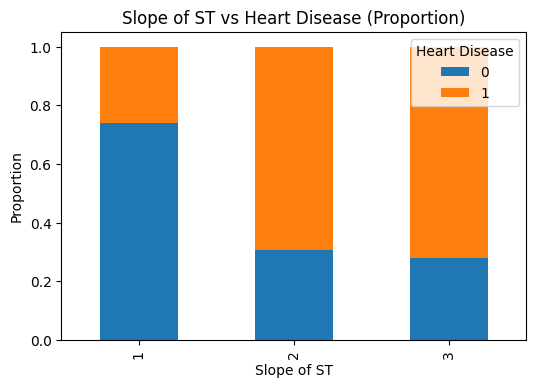


Disease proportion by Number of vessels fluro:
Heart Disease                   0         1
Number of vessels fluro                    
0                        0.696868  0.303132
1                        0.270654  0.729346
2                        0.102922  0.897078
3                        0.100451  0.899549


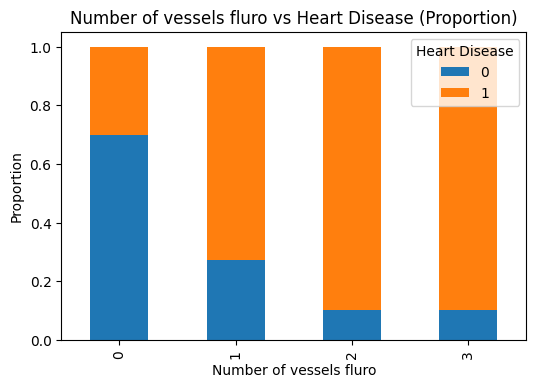


Disease proportion by Thallium:
Heart Disease         0         1
Thallium                         
3              0.801951  0.198049
6              0.313606  0.686394
7              0.184609  0.815391


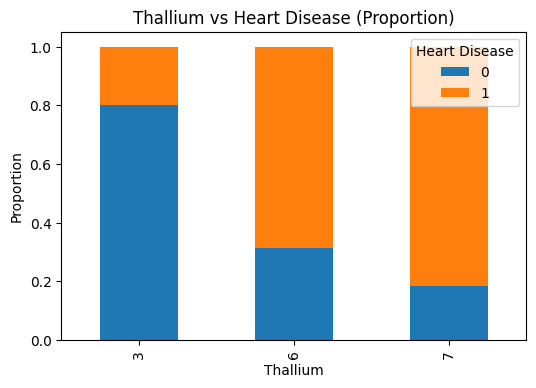

In [83]:
categorical_cols = [
    'Sex', 'Chest pain type', 'FBS over 120',
    'EKG results', 'Exercise angina',
    'Slope of ST', 'Number of vessels fluro',
    'Thallium'
]

for col in categorical_cols:
    categorical_feature_analysis(df, col)


# Bivariate Analysis — Categorical Features vs Heart Disease

---

## Disease Rate by Category

### Thallium

| Value | Disease Rate |
|---|---|
| 3 | 19.8% |
| 6 | 68.6% |
| 7 | 81.5% |

Clear risk gradient across all three values. The jump from value 3 to 6 alone represents a ~50 percentage point increase in disease rate.

---

### Number of Vessels (Fluoroscopy)

| Vessels | Disease Rate |
|---|---|
| 0 | 30.0% |
| 1 | 73.0% |
| 2 | 89.7% |
| 3 | 89.9% |

Near-monotonic increase. The relationship is almost perfectly ordinal — each additional vessel blocked corresponds to a higher disease rate. The plateau between 2 and 3 vessels suggests diminishing marginal risk beyond 2 blocked vessels, but both remain high-risk categories.

---

### Exercise Angina

| Value | Disease Rate |
|---|---|
| No | 31.0% |
| Yes | 80.6% |

Binary feature with a ~50 percentage point separation. Among the cleanest splits in the dataset.

---

### Chest Pain Type

| Type | Disease Rate |
|---|---|
| 1 | 10.8% |
| 2 | 16.2% |
| 3 | 19.1% |
| 4 | 69.7% |

Types 1–3 cluster at low risk (10–19%). Type 4 (asymptomatic) breaks sharply to 69.7%. Counter-intuitive clinically — asymptomatic presentation is highest risk — but a well-documented phenomenon where silent ischemia masks symptoms.

---

### Slope of ST

| Slope | Disease Rate |
|---|---|
| 1 | 26.0% |
| 2 | 69.0% |
| 3 | 72.0% |

Large jump from slope 1 to slope 2. Values 2 and 3 converge, suggesting they may behave similarly in a model. Consider grouping 2 and 3 as a single high-risk category during feature engineering.

---

## Summary by Signal Strength

| Strength | Feature | Disease Rate Range | Spread |
|---|---|---|---|
| Extremely Strong | Number of Vessels | 30% → 89.9% | ~60 pp |
| Very Strong | Thallium | 19.8% → 81.5% | ~62 pp |
| Very Strong | Exercise Angina | 31% → 80.6% | ~50 pp |
| Strong | Chest Pain Type | 10.8% → 69.7% | ~59 pp |
| Strong | Slope of ST | 26% → 72% | ~46 pp |
| Moderate | Sex | 18% → 55% | ~37 pp |
| Moderate | EKG Results | 34% → 56% | ~22 pp |
| Weak | FBS over 120 | 44% → 50% | ~6 pp |

> pp = percentage points spread between lowest and highest category disease rate.

---

## Key Observations

**Dataset is structurally dominated by stress-test and imaging features.**
The five strongest categorical predictors — Thallium, Number of Vessels, Exercise Angina, Chest Pain Type, Slope of ST — are all derived from exercise stress testing or cardiac imaging. This is not coincidental; the dataset was likely assembled in a clinical setting where these investigations were the primary diagnostic workup.

**Classic cardiovascular risk factors are weak here.**
BP, Cholesterol (from numeric analysis), and FBS (6 pp spread) show minimal discriminative power. This does not contradict their clinical importance in general population risk — it reflects that this dataset's population has already been selected for cardiac investigation, compressing the variation in those features.

**FBS is a candidate for removal.**
A 6 percentage point spread between FBS groups is negligible. Unless interaction effects emerge during modeling, FBS carries almost no standalone predictive value and may add noise rather than signal.

**Ordinality matters for Number of Vessels and Slope of ST.**
Both features show directional trends that should be respected during encoding. Use `OrdinalEncoder` with explicit category ordering rather than `OneHotEncoder`, which would destroy the directional information.

**Chest Pain Type 4 warrants special attention.**
The sharp discontinuity between types 1–3 and type 4 suggests this feature may behave more like a binary flag (Type 4 vs. Not Type 4) than a true 4-level ordinal. Consider engineering a binary `is_asymptomatic` feature alongside the original.

In [84]:
pd.crosstab(
    [df['Thallium'], df['Number of vessels fluro']],
    df['Heart Disease'],
    normalize='index'
)


Heart Disease                            0         1
Thallium Number of vessels fluro                    
3        0                        0.863678  0.136322
         1                        0.570446  0.429554
         2                        0.299025  0.700975
         3                        0.295447  0.704553
6        0                        0.456859  0.543141
         1                        0.146331  0.853669
         2                        0.063673  0.936327
         3                        0.074503  0.925497
7        0                        0.299399  0.700601
         1                        0.087418  0.912582
         2                        0.034089  0.965911
         3                        0.032695  0.967305

# Interaction Analysis — Thallium × Number of Vessels

---

## Disease Probability by Combined Category

### Thallium = 3 (Low Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 13.6% |
| 1 | 42.9% |
| 2 | 70.1% |
| 3 | 70.5% |

Even within the lowest-risk Thallium category, vessel count drives disease probability from 13.6% to 70.5%. Number of vessels is the dominant driver within this segment.

---

### Thallium = 6 (Moderate Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 54.3% |
| 1 | 85.4% |
| 2 | 93.6% |
| 3 | 92.5% |

A compounding effect is visible. Thallium = 6 at zero vessels already places the patient at 54.3% risk — above the baseline for the entire dataset. Each additional vessel pushes probability toward the 90s.

---

### Thallium = 7 (High Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 70.0% |
| 1 | 91.3% |
| 2 | 96.6% |
| 3 | 96.7% |

Thallium = 7 with 2 or more vessels produces ~97% disease probability. This is near-deterministic classification from two features alone.

---

## Cross-Segment Summary

| Thallium | Vessels = 0 | Vessels = 1 | Vessels = 2 | Vessels = 3 |
|---|---|---|---|---|
| 3 | 13.6% | 42.9% | 70.1% | 70.5% |
| 6 | 54.3% | 85.4% | 93.6% | 92.5% |
| 7 | 70.0% | 91.3% | 96.6% | 96.7% |

The gradient runs in both directions simultaneously — across rows (Thallium effect) and down columns (Vessel effect). The interaction is multiplicative, not merely additive.

---

## Key Observations

**The interaction is stronger than either feature individually.**
Thallium alone achieves a correlation of 0.61. Number of vessels alone is similarly strong. But their combination produces near-perfect separation in the high-risk segments (Thallium 7, Vessels ≥ 2 → 97%). This level of separation cannot be explained by additive effects alone — a genuine multiplicative interaction exists.

**The dataset contains near-rule-based patterns.**
The segment Thallium = 7 and Vessels ≥ 2 is essentially a deterministic rule. This is a structurally important finding: parts of this dataset behave less like a probabilistic classification problem and more like a decision tree with hard boundaries. This has direct implications for model selection.

**Risk is almost monotonic within each Thallium level.**
Within Thallium = 3, 6, and 7, disease rate increases with vessel count with only minor non-monotonicity at the top end (Vessels 2 vs. 3 converge). This confirms that Number of Vessels should be treated as ordinal, not nominal.

---

## Modeling Implications

**Tree-based models are structurally aligned with this data.**
Gradient boosting and random forests discover interactions naturally through sequential splits. A model will likely split first on Thallium or Number of Vessels, then refine using the other — exactly mirroring the pattern observed here. This is why tree-based models are expected to dominate on this dataset.

**Logistic regression requires an explicit interaction term.**
Without `Thallium × Vessels` as an engineered feature, logistic regression assumes additive linear effects and will systematically underestimate risk in high-combined-risk segments. The interaction term must be explicitly constructed and included.

**Deep learning is likely unnecessary.**
When two features in combination produce ~97% disease probability in identifiable segments, the problem has strong rule-like structure that shallow models handle efficiently. Gradient boosting will almost certainly match or exceed neural network performance here, with substantially lower complexity and better interpretability.

---

## Feature Engineering Action

Based on this interaction, the following feature should be created before modeling:

```python
df['Thallium_x_Vessels'] = OneHot(df['Thallium']) * df['Number of vessels fluro']
```

This encodes the multiplicative relationship explicitly and ensures linear models can access the interaction signal without relying on the model to discover it implicitly.

In [85]:
pd.crosstab(
    df['Exercise angina'],
    [pd.cut(df['ST depression'], bins=[-1, 0.5, 1.5, 10]), df['Heart Disease']],
    normalize='index'
)


ST depression   (-1.0, 0.5]           (0.5, 1.5]           (1.5, 10.0]  \
Heart Disease             0         1          0         1           0   
Exercise angina                                                          
0                  0.522200  0.132496   0.115434  0.082441    0.048934   
1                  0.131408  0.236855   0.040250  0.237244    0.022053   

ST depression              
Heart Disease           1  
Exercise angina            
0                0.098496  
1                0.332189

# Feature Engineering — Feature Group Definitions

---

## Group Classification

| Feature | Group | Encoding Strategy | Rationale |
|---|---|---|---|
| `id` | Drop | — | Unique identifier, carries no predictive signal |
| `Age` | Numeric (Continuous) | StandardScaler | Continuous range, linear and non-linear signal possible |
| `BP` | Numeric (Continuous) | StandardScaler | Continuous, weak standalone signal but retained for interactions |
| `Cholesterol` | Numeric (Continuous) | StandardScaler | Continuous, weak linear signal; non-linear models may extract value |
| `Max HR` | Numeric (Continuous) | StandardScaler | Strong negative predictor; continuous range |
| `ST depression` | Numeric (Continuous) | StandardScaler | Strongest numeric predictor; float, right-skewed distribution |
| `Sex` | Binary | Keep as-is | Already 0/1 encoded, no transformation needed |
| `FBS over 120` | Binary | Keep as-is | Already 0/1 encoded |
| `Exercise angina` | Binary | Keep as-is | Already 0/1 encoded |
| `Chest pain type` | Nominal Categorical | OneHotEncoder | 4 unordered categories; no natural ranking between types |
| `EKG results` | Nominal Categorical | OneHotEncoder | Values 0/1/2 are labels, not a meaningful scale |
| `Slope of ST` | Nominal Categorical | OneHotEncoder | Values 1/2/3 show non-linear jump (1→2 large, 2→3 small); ordinal assumption unsafe |
| `Thallium` | Nominal Categorical | OneHotEncoder | Values 3/6/7 are non-consecutive labels, not a continuous scale |
| `Number of vessels fluro` | Ordinal Numeric | Keep as-is | 0–3 with near-monotonic risk increase; numeric ordering is meaningful |

---

## Notes on Key Decisions

**Slope of ST — Nominal, not Ordinal.**
Although values 1, 2, 3 suggest an ordering, EDA showed that the risk jump between slope 1 and slope 2 is large (~43 pp) while slope 2 and slope 3 are nearly identical (69% vs 72%). The relationship is non-linear and the ordinal assumption would misrepresent the spacing. OneHotEncoding is safer.

**Thallium — Nominal, not Ordinal.**
Values are 3, 6, and 7 — non-consecutive integers that represent distinct test result categories, not a continuous or evenly-spaced scale. Treating them as numeric would imply a false magnitude relationship (7 ≈ 2.3× the effect of 3), which is not supported by the data.

**Number of Vessels — Retained as Numeric.**
0 to 3 with a near-monotonic increase in disease rate confirmed in EDA. The integer ordering carries real meaning here, unlike Thallium or Slope of ST. Keeping it numeric preserves the ordinal signal without adding unnecessary columns.

**Binary Features — No transformation.**
Sex, FBS, and Exercise Angina are already in 0/1 form. Re-encoding them would produce identical results. Scaling is unnecessary since they are bounded [0, 1] by definition.

---

## Implementation

```python
# Feature group definitions
drop_cols       = ['id']

numeric_cols    = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

binary_cols     = ['Sex', 'FBS over 120', 'Exercise angina']

nominal_cols    = ['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium']

ordinal_cols    = ['Number of vessels fluro']

target_col      = 'Heart Disease'
```

```python
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(transformers=[
    ('numeric',  StandardScaler(),                numeric_cols),
    ('nominal',  OneHotEncoder(drop='first',
                               handle_unknown='ignore'), nominal_cols),
    ('binary',   'passthrough',                   binary_cols),
    ('ordinal',  'passthrough',                   ordinal_cols),
])
```

> `drop='first'` in OneHotEncoder removes one dummy column per feature to avoid multicollinearity (dummy variable trap). This is important for linear models; tree-based models are unaffected either way.

---

## What This Produces After Transformation

| Source | Original Columns | Output Columns |
|---|---|---|
| Numeric | 5 | 5 (scaled) |
| Nominal (OneHot) | 4 | ~10 (depending on cardinality) |
| Binary | 3 | 3 (passthrough) |
| Ordinal | 1 | 1 (passthrough) |
| **Total** | **13** | **~19** |

Final feature count will vary slightly based on exact cardinality of nominal columns after `drop='first'` is applied.

In [4]:
# Drop columns
drop_cols = ['id', 'Heart Disease']

target_col = 'Heart Disease'

# Feature groups
numeric_features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression'
]

binary_features = [
    'Sex',
    'FBS over 120',
    'Exercise angina'
]

categorical_features = [
    'Chest pain type',
    'EKG results',
    'Slope of ST',
    'Thallium'
]

ordinal_features = [
    'Number of vessels fluro'
]


In [5]:
test = pd.read_csv(r'test.csv')

In [6]:
X = df.drop(columns=drop_cols)
y = df[target_col]

X_test = test.drop(columns=['id'])
test_ids = test['id']


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bin', 'passthrough', binary_features),
        ('ord', 'passthrough', ordinal_features)
    ]
)


In [8]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

lgb_model = LGBMClassifier(
    n_estimators=1600,
    learning_rate=0.02,
    max_depth=8,
    num_leaves=31,
    min_child_samples=40,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=0.5,
    random_state=42,
    n_jobs=-1
)

lgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', lgb_model)
])


In [91]:
from sklearn.model_selection import StratifiedKFold, cross_validate

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results = cross_validate(
    lgb_pipeline,
    X,
    y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1
)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.upper()} Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")


ACCURACY Mean: 0.8887 | Std: 0.0009
PRECISION Mean: 0.8820 | Std: 0.0006
RECALL Mean: 0.8678 | Std: 0.0022
F1 Mean: 0.8748 | Std: 0.0012
ROC_AUC Mean: 0.9553 | Std: 0.0005


In [92]:
import numpy as np
from sklearn.metrics import roc_auc_score

oof_preds = np.zeros(len(X))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    lgb_pipeline.fit(X_tr, y_tr)
    
    oof_preds[val_idx] = lgb_pipeline.predict_proba(X_val)[:, 1]

print("OOF ROC-AUC:", roc_auc_score(y, oof_preds))


[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383


c:\Users\Bhavik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383


c:\Users\Bhavik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383


c:\Users\Bhavik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383


c:\Users\Bhavik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 225964, number of negative: 278036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448341 -> initscore=-0.207375
[LightGBM] [Info] Start training from score -0.207375


c:\Users\Bhavik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


OOF ROC-AUC: 0.955308731572325


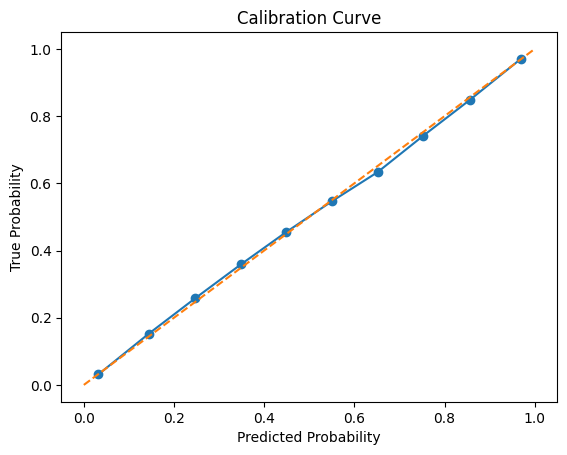

Brier Score: 0.08125798562087513


In [93]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss

prob_true, prob_pred = calibration_curve(y, oof_preds, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.show()

print("Brier Score:", brier_score_loss(y, oof_preds))


In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.91, 0.05)

for t in thresholds:
    preds = (oof_preds >= t).astype(int)
    print(f"\nThreshold: {t}")
    print("Precision:", precision_score(y, preds))
    print("Recall:", recall_score(y, preds))
    print("F1:", f1_score(y, preds))



Threshold: 0.1
Precision: 0.7015677962859526
Recall: 0.973857690101751
F1: 0.8155864872437671

Threshold: 0.15000000000000002
Precision: 0.7466196694787934
Recall: 0.9606555403711755
F1: 0.8402210937016164

Threshold: 0.20000000000000004
Precision: 0.7785700369020859
Recall: 0.9478959405779348
F1: 0.8549295347392857

Threshold: 0.25000000000000006
Precision: 0.8036859632316044
Recall: 0.9356001331190211
F1: 0.8646406083082898

Threshold: 0.30000000000000004
Precision: 0.8239187954618018
Recall: 0.9227555637378122
F1: 0.8705408063915456

Threshold: 0.3500000000000001
Precision: 0.8409811446687803
Recall: 0.9100242871405609
F1: 0.8741415106691584

Threshold: 0.40000000000000013
Precision: 0.8559092122289155
Recall: 0.8969177281964497
F1: 0.875933759882166

Threshold: 0.45000000000000007
Precision: 0.8696906482851003
Recall: 0.8826534586162703
F1: 0.8761241078300106

Threshold: 0.5000000000000001
Precision: 0.8820112921973003
Recall: 0.8677625383248245
F1: 0.8748289000526461

Threshold: 

In [95]:
lgb_pipeline.fit(X, y)

feature_names = lgb_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = lgb_pipeline.named_steps['model'].feature_importances_

importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
)

importance_df.head(20)


[LightGBM] [Info] Number of positive: 282454, number of negative: 347546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 630000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448340 -> initscore=-0.207381
[LightGBM] [Info] Start training from score -0.207381


,Feature,Importance
3,num__Max HR,10983
2,num__Cholesterol,7939
0,num__Age,6462
4,num__ST depression,4912
1,num__BP,4892
21,ord__Number of vessels fluro,2162
20,bin__Exercise angina,1472
18,bin__Sex,1313
8,cat__Chest pain type_4,1164
12,cat__Slope of ST_1,1116


In [96]:
lgb_pipeline.fit(X, y)


[LightGBM] [Info] Number of positive: 282454, number of negative: 347546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 630000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448340 -> initscore=-0.207381
[LightGBM] [Info] Start training from score -0.207381


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [97]:
test_probs = lgb_pipeline.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_probs
})

submission.to_csv("submission_final.csv", index=False)


c:\Users\Bhavik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [9]:
from xgboost import XGBClassifier

xgb_final = XGBClassifier(
    n_estimators=972,
    learning_rate=0.08233334476657686,
    max_depth=3,
    subsample=0.6967792979720865,
    colsample_bytree=0.7773146292728021,
    reg_alpha=1.911349598671315,
    reg_lambda=0.6194119678307304,
    tree_method="hist",   # use "gpu_hist" if GPU available
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_preds = np.zeros(len(X))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    
    print(f"Fold {fold+1}")
    
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model = xgb_final
    model.fit(X_tr, y_tr)
    
    oof_preds[val_idx] = model.predict_proba(X_val)[:, 1]

oof_auc = roc_auc_score(y, oof_preds)
print("Final XGBoost OOF ROC-AUC:", oof_auc)


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Final XGBoost OOF ROC-AUC: 0.9554845840220193


In [106]:
xgb_final.fit(X, y)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7773146292728021
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [108]:
test = pd.read_csv(r'test.csv')
test_ids = test['id']

In [ ]:
test_probs = xgb_final.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    "id": test_ids,
    "Heart Disease": test_probs
})

submission.to_csv("submission_xgb_optuna_final.csv", index=False) 


[I 2026-02-18 14:57:46,528] A new study created in memory with name: no-name-e4aba5e9-2269-4f79-8a94-98cecdb875d3
[I 2026-02-18 15:01:09,770] Trial 0 finished with value: 0.9554795423760252 and parameters: {'n_estimators': 972, 'learning_rate': 0.08233334476657686, 'max_depth': 3, 'subsample': 0.6967792979720865, 'colsample_bytree': 0.7773146292728021, 'reg_alpha': 1.911349598671315, 'reg_lambda': 0.6194119678307304}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:06:37,453] Trial 1 finished with value: 0.9551940251487949 and parameters: {'n_estimators': 1259, 'learning_rate': 0.022349124144720414, 'max_depth': 6, 'subsample': 0.999472400700091, 'colsample_bytree': 0.9298525733469147, 'reg_alpha': 1.6204530571916198, 'reg_lambda': 1.3587839803793427}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:14:06,510] Trial 2 finished with value: 0.95392033438131 and parameters: {'n_estimators': 1650, 'learning_rate': 0.07844502049496534, 'max_depth': 6, 'subsample': 0.7392865374063277, 'colsample_bytree': 0.6983384888058707, 'reg_alpha': 0.36201332597755953, 'reg_lambda': 0.632428563678092}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:21:59,273] Trial 3 finished with value: 0.954743517197211 and parameters: {'n_estimators': 1712, 'learning_rate': 0.04249646836589486, 'max_depth': 6, 'subsample': 0.9814922777669242, 'colsample_bytree': 0.9734337949328069, 'reg_alpha': 1.3344397363263363, 'reg_lambda': 0.888577971239537}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:26:08,461] Trial 4 finished with value: 0.95545854412221 and parameters: {'n_estimators': 1324, 'learning_rate': 0.04254947117802929, 'max_depth': 3, 'subsample': 0.6901253219973735, 'colsample_bytree': 0.8434663276686175, 'reg_alpha': 1.3090736418668472, 'reg_lambda': 0.29144514683612477}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:29:28,421] Trial 5 finished with value: 0.9551624763117385 and parameters: {'n_estimators': 530, 'learning_rate': 0.031061571615166202, 'max_depth': 8, 'subsample': 0.617244422974397, 'colsample_bytree': 0.6527758270580687, 'reg_alpha': 0.019923648569115215, 'reg_lambda': 1.5749713086966062}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:34:08,597] Trial 6 finished with value: 0.9553212734049003 and parameters: {'n_estimators': 1118, 'learning_rate': 0.024543179373023548, 'max_depth': 4, 'subsample': 0.755019683155667, 'colsample_bytree': 0.7140073882478111, 'reg_alpha': 0.00690355244133567, 'reg_lambda': 1.9734036426049117}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:43:10,381] Trial 7 finished with value: 0.9553098521616461 and parameters: {'n_estimators': 1792, 'learning_rate': 0.010672108268780223, 'max_depth': 6, 'subsample': 0.6709164528755784, 'colsample_bytree': 0.7545991210924937, 'reg_alpha': 0.756585933225858, 'reg_lambda': 1.3619372134019287}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:49:41,660] Trial 8 finished with value: 0.9533598105368853 and parameters: {'n_estimators': 1018, 'learning_rate': 0.06422191000464911, 'max_depth': 8, 'subsample': 0.7347185454832138, 'colsample_bytree': 0.79645720250218, 'reg_alpha': 0.22453339605430367, 'reg_lambda': 0.6893230689376224}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 16:02:42,981] Trial 9 finished with value: 0.9500904071530777 and parameters: {'n_estimators': 1655, 'learning_rate': 0.06466354878648917, 'max_depth': 10, 'subsample': 0.9500226360655828, 'colsample_bytree': 0.7353004235933805, 'reg_alpha': 1.3105849316211404, 'reg_lambda': 1.65639656072337}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 16:05:35,649] Trial 10 finished with value: 0.9541961114708324 and parameters: {'n_estimators': 719, 'learning_rate': 0.012023055105610204, 'max_depth': 4, 'subsample': 0.858234681268302, 'colsample_bytree': 0.8770353550753643, 'reg_alpha': 1.9845929612094648, 'reg_lambda': 0.08172335326394853}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 16:09:56,817] Trial 11 finished with value: 0.9554320643999931 and parameters: {'n_estimators': 1379, 'learning_rate': 0.09270190693539838, 'max_depth': 3, 'subsample': 0.6665950791114147, 'colsample_bytree': 0.8850369596424076, 'reg_alpha': 1.9590336394969685, 'reg_lambda': 0.19246166342623883}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 16:12:32,199] Trial 12 finished with value: 0.9553277059890681 and parameters: {'n_estimators': 850, 'learning_rate': 0.0454375985324689, 'max_depth': 3, 'subsample': 0.839126545335005, 'colsample_bytree': 0.8375474832956952, 'reg_alpha': 0.9472992835000685, 'reg_lambda': 0.4093224173821632}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 16:17:44,405] Trial 13 finished with value: 0.9553813157366362 and parameters: {'n_estimators': 1407, 'learning_rate': 0.049869190581501945, 'max_depth': 4, 'subsample': 0.6757088117688442, 'colsample_bytree': 0.8022307088921905, 'reg_alpha': 1.5815612522872362, 'reg_lambda': 0.37694095948148454}. Best is trial 0 with value: 0.9554795423760252.


In [ ]:
LGBM :
[I 2026-02-18 17:12:02,262] A new study created in memory with name: no-name-58b318ea-ca00-4216-a31f-2b3d50e23949
[I 2026-02-18 17:18:48,119] Trial 0 finished with value: 0.955305476358828 and parameters: {'n_estimators': 1661, 'learning_rate': 0.012503626241860565, 'num_leaves': 31, 'max_depth': 6, 'min_child_samples': 43, 'subsample': 0.643072395692159, 'colsample_bytree': 0.7211161958467457, 'reg_alpha': 1.0504857541588257, 'reg_lambda': 0.11946226125639381}. Best is trial 0 with value: 0.955305476358828.
[I 2026-02-18 17:23:50,126] Trial 1 finished with value: 0.9548460325571176 and parameters: {'n_estimators': 1145, 'learning_rate': 0.03643206249855194, 'num_leaves': 76, 'max_depth': 11, 'min_child_samples': 94, 'subsample': 0.9705607967901937, 'colsample_bytree': 0.8288953618856563, 'reg_alpha': 0.11087431065773923, 'reg_lambda': 0.8453749001584694}. Best is trial 0 with value: 0.955305476358828.
[I 2026-02-18 17:30:42,828] Trial 2 finished with value: 0.954399185433991 and parameters: {'n_estimators': 1596, 'learning_rate': 0.034050749711640266, 'num_leaves': 107, 'max_depth': 12, 'min_child_samples': 94, 'subsample': 0.643457342403678, 'colsample_bytree': 0.828521395553834, 'reg_alpha': 0.9201254860761354, 'reg_lambda': 0.48654403327151874}. Best is trial 0 with value: 0.955305476358828.
[I 2026-02-18 17:40:41,946] Trial 3 finished with value: 0.9550954816321092 and parameters: {'n_estimators': 2088, 'learning_rate': 0.0075679910275625985, 'num_leaves': 59, 'max_depth': 8, 'min_child_samples': 66, 'subsample': 0.710977160601307, 'colsample_bytree': 0.9000970260036076, 'reg_alpha': 0.7163035342249411, 'reg_lambda': 0.6969859616140797}. Best is trial 0 with value: 0.955305476358828.


In [ ]:
CAT :
[I 2026-02-18 17:42:24,836] A new study created in memory with name: no-name-64701059-412c-4e17-9a30-6e22a143309e
[I 2026-02-18 17:53:53,184] Trial 0 finished with value: 0.9544202929163217 and parameters: {'iterations': 2172, 'learning_rate': 0.0218482944613365, 'depth': 9, 'l2_leaf_reg': 9.396329959813366, 'bagging_temperature': 3.099469803502721, 'random_strength': 0.012231691554029367}. Best is trial 0 with value: 0.9544202929163217.
[I 2026-02-18 18:00:27,302] Trial 1 finished with value: 0.9543542550265347 and parameters: {'iterations': 1150, 'learning_rate': 0.04805787092429408, 'depth': 10, 'l2_leaf_reg': 6.696332007035034, 'bagging_temperature': 2.1976232762203396, 'random_strength': 2.850698220141567}. Best is trial 0 with value: 0.9544202929163217.
[I 2026-02-18 18:03:35,657] Trial 2 finished with value: 0.9552393173320962 and parameters: {'iterations': 1113, 'learning_rate': 0.033106918233468, 'depth': 4, 'l2_leaf_reg': 4.522632273127602, 'bagging_temperature': 0.6174603643601095, 'random_strength': 3.258620158559541}. Best is trial 2 with value: 0.9552393173320962.
[I 2026-02-18 18:12:47,886] Trial 3 finished with value: 0.9554489695564933 and parameters: {'iterations': 2443, 'learning_rate': 0.028617286398439353, 'depth': 6, 'l2_leaf_reg': 3.5313325975665264, 'bagging_temperature': 0.5274409717782269, 'random_strength': 0.03843459373261249}. Best is trial 3 with value: 0.9554489695564933.
[I 2026-02-18 18:16:33,912] Trial 4 finished with value: 0.9543243318276178 and parameters: {'iterations': 878, 'learning_rate': 0.01066662262916323, 'depth': 6, 'l2_leaf_reg': 4.77313394041073, 'bagging_temperature': 1.1137090824295781, 'random_strength': 4.202083984391846}. Best is trial 3 with value: 0.9554489695564933.


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

def train_xgb_oof(X, y, model, n_splits=5):
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(X))
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        
        print(f"Training Fold {fold+1}")
        
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        
        oof_preds[val_idx] = model.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y, oof_preds)
    
    print(f"\nOOF ROC-AUC: {auc:.6f}")
    
    return oof_preds, auc


In [11]:
oof_preds, final_auc = train_xgb_oof(X, y, xgb_final)


Training Fold 1
Training Fold 2
Training Fold 3
Training Fold 4
Training Fold 5

OOF ROC-AUC: 0.955485


In [26]:
y_pred = (oof_preds >= 0.5).astype(int)
y_true = y.values

In [27]:
from sklearn.metrics import classification_report

# Assuming y_true are the true labels and y_pred are model predictions
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90    347546
           1       0.88      0.87      0.88    282454

    accuracy                           0.89    630000
   macro avg       0.89      0.89      0.89    630000
weighted avg       0.89      0.89      0.89    630000



In [12]:
import joblib

joblib.dump(xgb_final, "xgb_heart_disease_v1.pkl")


['xgb_heart_disease_v1.pkl']

In [13]:
pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 6.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------- ----------------- 1.6/2.8 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 7.2 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.1 MB 9.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.9/38.1 MB 7.6 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/38.1 MB 5.9 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/38.1 MB 5.0 MB/s eta 0:00:07
   ---- ----------------------------------- 4.7/38.1 MB 4.6 MB/s eta 0:00:08
   ----- ---------------------------------- 5.5/38.1 MB 4.5 MB/s eta 0:00:08
   ------ --------------------------------- 6.3/38.1 MB 4.4 MB/s eta 0:00:08
   ------- --------------

In [14]:
import shap

explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X)


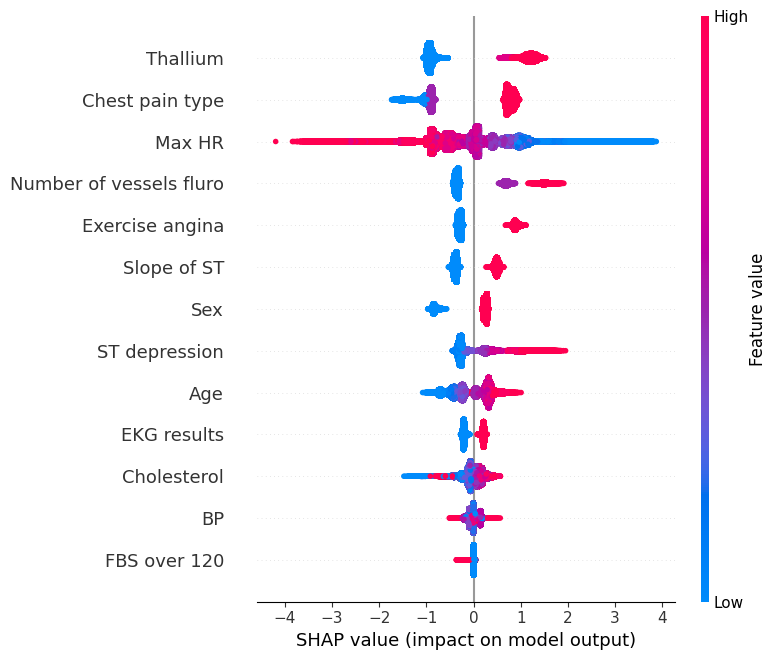

In [15]:
shap.summary_plot(shap_values, X)


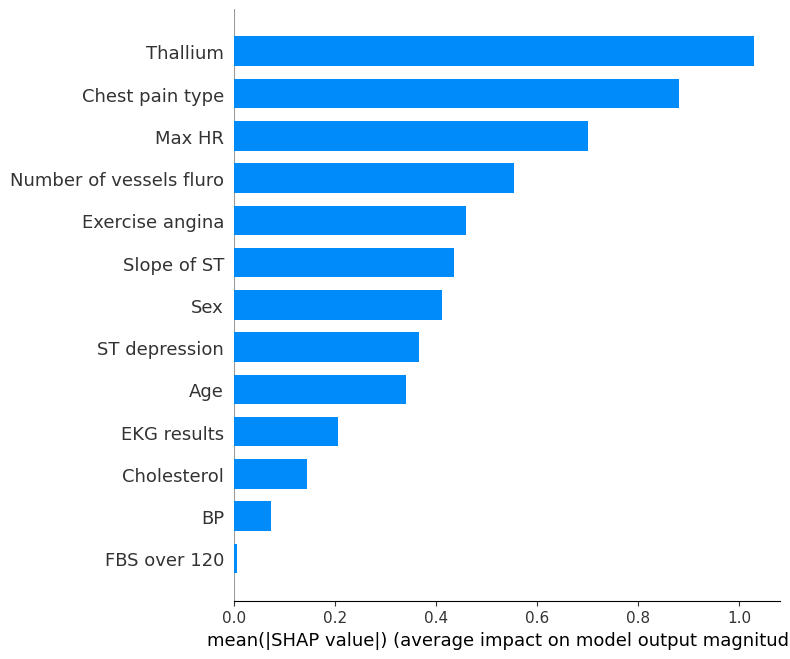

In [16]:
shap.summary_plot(shap_values, X, plot_type="bar")
